In [1]:
from fastai.vision.all import *
from pathlib import Path
from fastai.metrics import *
from fastai.interpret import ClassificationInterpretation

In [2]:
# Set the path to your dataset (replace 'path_to_your_dataset' with the actual path)
path = Path('D:/AI Project Guidelines/project 1/data')

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


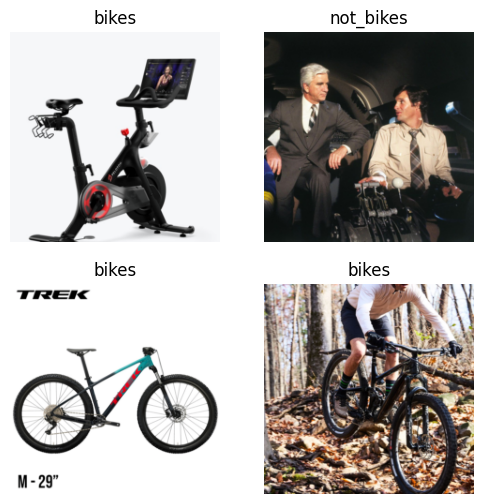

In [3]:
# Define the data loader
data = ImageDataLoaders.from_folder(path, train='train', valid='valid', seed=42, item_tfms=Resize(224), batch_tfms=[Normalize.from_stats(*imagenet_stats)], bs=4)
# Assuming you have already created the data object
data.show_batch(max_n=4)

In [4]:
data.vocab

['bikes', 'not_bikes']

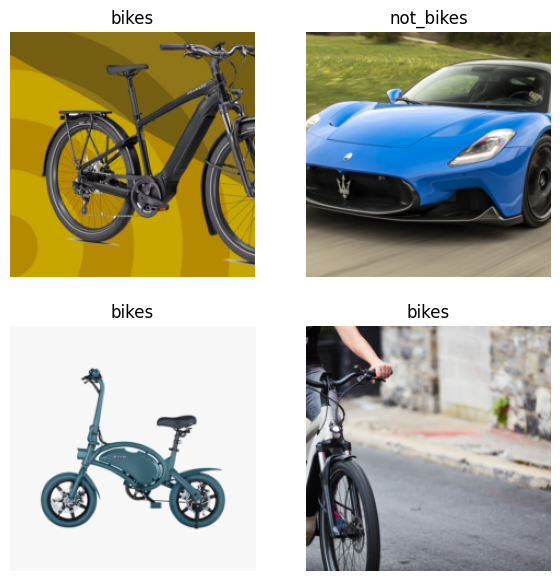

In [7]:
# Visualize a batch of augmented images
data.train.show_batch(max_n=4, nrows=2, figsize=(7, 7))

In [8]:
# Specify metrics as a list of metric functions
metrics = [accuracy, Precision(), Recall(), error_rate]
# Define the model
densenet_learn = vision_learner(data, densenet121, metrics=metrics)

In [9]:
print(densenet_learn.model)

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SuggestedLRs(valley=0.0014454397605732083)

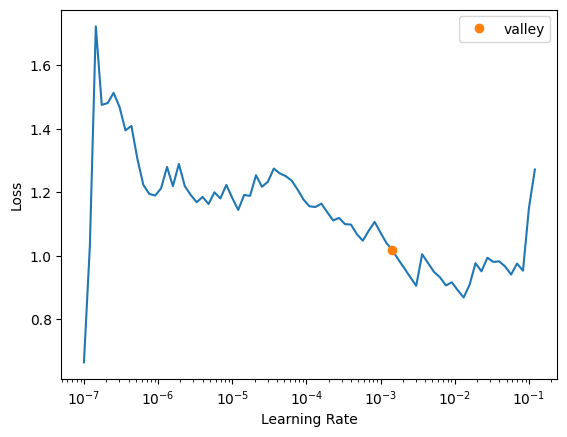

In [10]:
# Find a suitable learning rate
densenet_learn.lr_find()

In [11]:
# Train the resnet model
densenet_learn.fine_tune(4, base_lr=0.0014454397605732083)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,error_rate,time
0,0.609149,0.151485,0.966102,0.966667,0.966667,0.033898,02:13


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,error_rate,time
0,0.372123,0.161716,0.983051,0.967742,1.000000,0.016949,03:10
1,0.531832,0.327647,0.915254,0.878788,0.966667,0.084746,02:52
2,0.393408,0.229264,0.966102,0.966667,0.966667,0.033898,02:55
3,0.354435,0.224834,0.966102,0.966667,0.966667,0.033898,02:52


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency exp

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


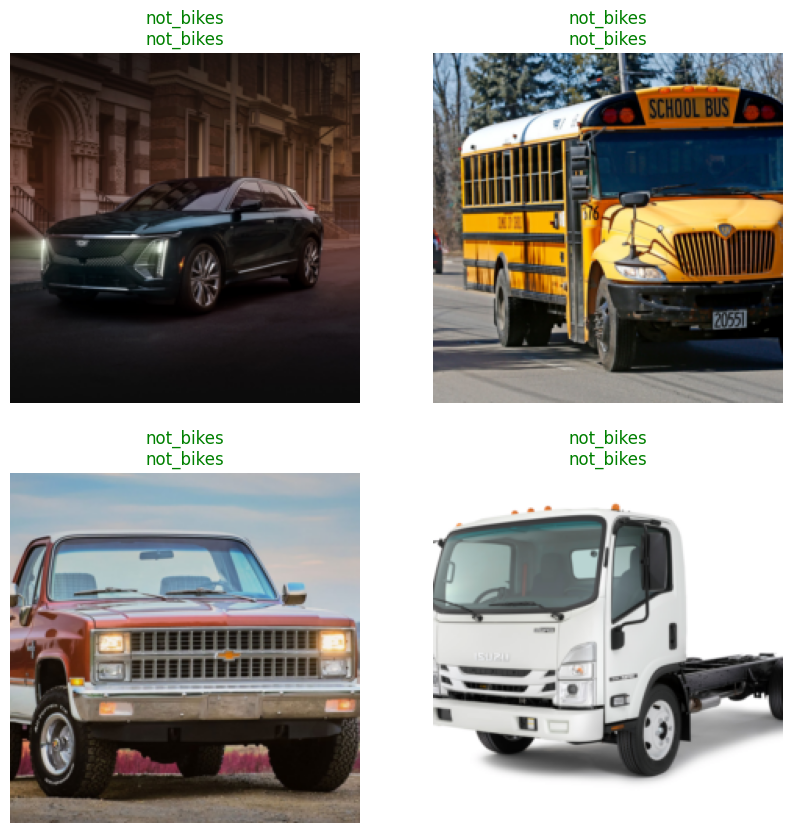

In [12]:
densenet_learn.show_results(max_n=4, figsize=(10, 10))

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


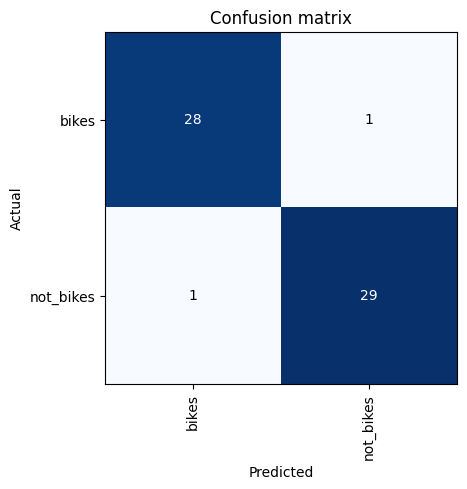

In [13]:
interp = ClassificationInterpretation.from_learner(densenet_learn)
interp.plot_confusion_matrix()

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


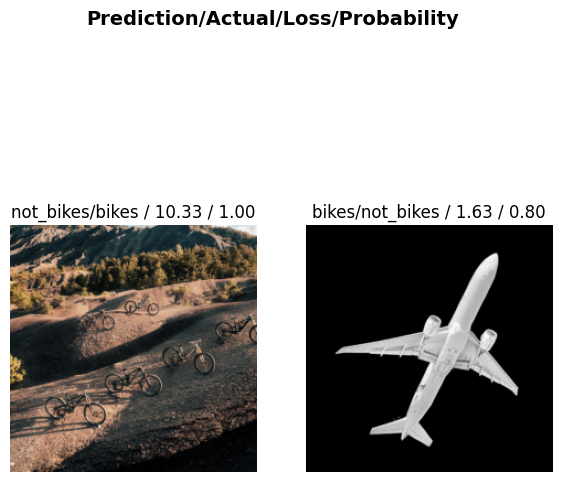

In [14]:
# Assuming 'learn' is your learner
interp = ClassificationInterpretation.from_learner(densenet_learn)

# Plot top losses
interp.plot_top_losses(2, figsize=(7, 7))

In [17]:
# Export the model for inference
densenet_learn.export('D:/AI Project Guidelines/project 1/models/densenet.pkl')

In [18]:
# Load the trained model for inference
learn = load_learner('D:/AI Project Guidelines/project 1/models/densenet.pkl')

# Make predictions on a new image
img = PILImage.create('D:/AI Project Guidelines/project 1/samples/sample5.jpeg')
prediction, _, _ = learn.predict(img)
print(f'The image is a {prediction}')

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


The image is a bikes
